In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)


In [5]:
train_data = gen_train.flow_from_directory("./project/waste",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 8369 images belonging to 9 classes.


In [6]:

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

In [7]:

for layer in vgg16.layers:
  layer.trainable = False

In [8]:
from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [9]:

prediction = layers.Dense(units = 9, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 9)                   │         225,801 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,940,489 (56.99 MB)

 Trainable params: 225,801 (882.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
 
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit(train_data, epochs = 10, steps_per_epoch=len(train_data))

Epoch 1/10


C:\Users\trish\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


262/262 ━━━━━━━━━━━━━━━━━━━━ 2862s 11s/step - accuracy: 0.3002 - loss: 2.1125
Epoch 2/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


C:\Users\trish\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


262/262 ━━━━━━━━━━━━━━━━━━━━ 6075s 23s/step - accuracy: 0.4439 - loss: 1.6298
Epoch 4/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 2976s 11s/step - accuracy: 0.4793 - loss: 1.5250
Epoch 6/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 4699s 18s/step - accuracy: 0.5328 - loss: 1.3586
Epoch 8/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 6250s 24s/step - accuracy: 0.5328 - loss: 1.3528
Epoch 10/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [11]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)
  print("predicted_accuracy",predicted_accuracy)
  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

In [12]:
model

<Functional name=functional_1, built=True>

In [13]:
result

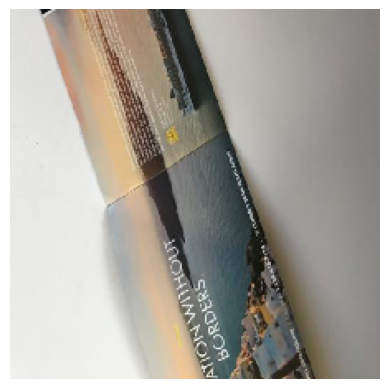

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
predicted_accuracy 95.55
Your waste material is  paper  with  95.55  % accuracy


In [14]:
waste_prediction("./project/waste/paper/paper102.jpg")

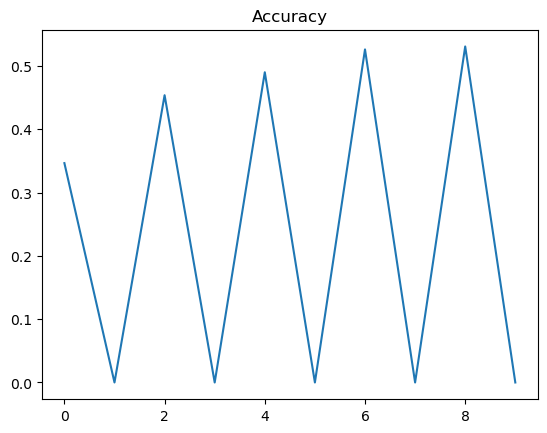

In [15]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

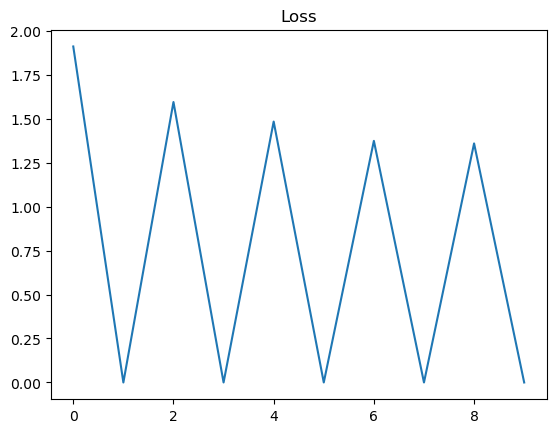

In [17]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [18]:
model_version=1
model.save(f"./models/{model_version}.h5")


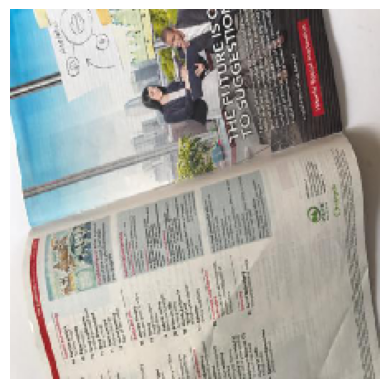

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted_accuracy 60.92
Your waste material is  paper  with  60.92  % accuracy


In [21]:
waste_prediction("./project/waste/paper/paper90.jpg")

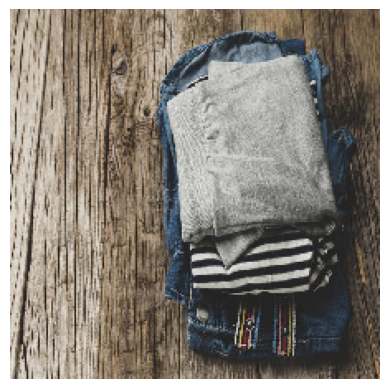

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
predicted_accuracy 99.34
Your waste material is  clothes  with  99.34  % accuracy


In [22]:
waste_prediction("./project/waste/clothes/pic76.jpg")

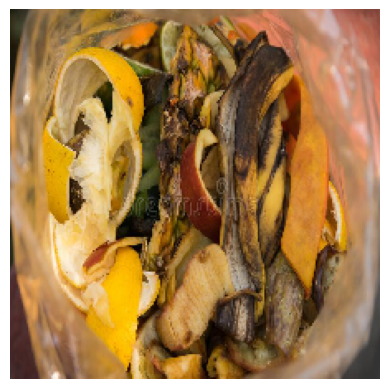

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted_accuracy 99.59
Your waste material is  organic  with  99.59  % accuracy


In [24]:
waste_prediction("./project/waste/organic/bag-organic-waste-compost-202229127.jpg")

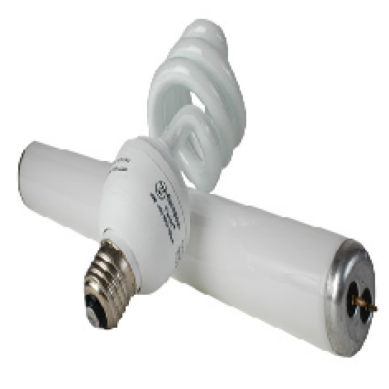

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
predicted_accuracy 60.45
Your waste material is  light blubs  with  60.45  % accuracy


In [25]:
waste_prediction("./project/waste/light blubs/detail_th_lightbulbs_margin.jpg")

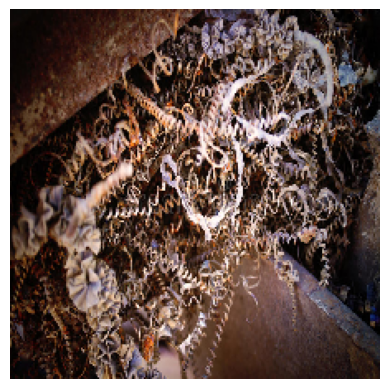

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
predicted_accuracy 40.87
Your waste material is  metal  with  40.87  % accuracy


In [26]:
waste_prediction("./project/waste/metal/metal-filings-container-filled-waste-product-caused-machining-steel-plates-44736384.jpg")